In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import random
import math

In [2]:
df = pd.read_csv("/Users/subhangidhasmana/minor-project/project/feature_vectors_syscallsbinders_frequency_5_Cat.csv")

In [3]:
df

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,2,0,0,11,0,61,13,0,66,17,...,0,0,0,0,0,0,10,2764,236,5
11594,6,0,0,10,1,69,50,1,118,15,...,0,0,0,0,1,0,5,4417,295,5
11595,0,0,0,0,0,21,16,0,48,9,...,0,0,0,0,0,0,5,241,67,5
11596,1,0,0,15,0,90,80,0,239,50,...,0,0,0,0,0,0,3,1703,774,5


1 -> Adware

2 -> Banking malware

3 -> SMS malware

4 -> Riskware

5 -> Benign

# Traditional Machine learning algorithms
1. SVM (Support vector machine)
2. Logistic regression
3. Random Forest

In [4]:
X = df.loc[:, "ACCESS_PERSONAL_INFO___":"writev"]
y = df["Class"]

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

In [8]:
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

In [9]:
print(accuracy_scores)

{'Logistic Regression': 0.8556034482758621, 'Random Forest': 0.9435344827586207, 'SVM': 0.8637931034482759}


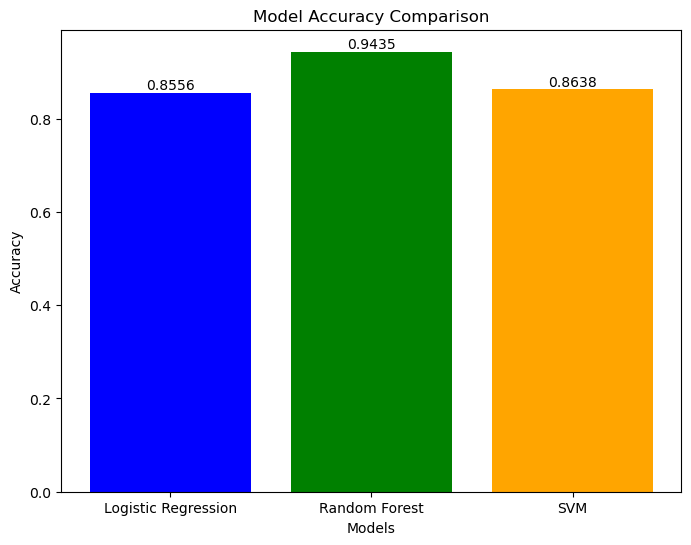

In [34]:
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange'])

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),                 
        f"{bar.get_height():.4f}",        
        ha='center',                      
        va='bottom'                       
    )

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

### Result
1. Logistic Regression: 85.56%
2. Random Forest: 94.35%
3. SVM: 86.38%

# Meta heuristic optimization algorithms
1. Particle swarm optimization(PSO)
2. Genetic algorithms(GA)
3. Simulated annealing(SA)

### Particle Swarm Optimization(PSO)

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

class PSORandomForestHybrid:
    def __init__(self, 
                  n_particles=30, 
                 max_iter=100, 
                 w=0.7, 
                 c1=1.5, 
                 c2=1.5):
        self.n_particles = n_particles
        self.max_iter = max_iter
        self.w = w
        self.c1 = c1
        self.c2 = c2
        
    def fitness_function(self, X_train, X_test, y_train, y_test, feature_subset, rf_params):
        X_train_selected = X_train[:, feature_subset]
        X_test_selected = X_test[:, feature_subset]
        rf = RandomForestClassifier(**rf_params, random_state=42)
        rf.fit(X_train_selected, y_train)
        y_pred = rf.predict(X_test_selected)
        
        return accuracy_score(y_test, y_pred)
    
    def initialize_population(self, n_features, rf_param_ranges):
        feature_particles = np.random.choice(
            [0, 1], 
            size=(self.n_particles, n_features), 
            p=[0.5, 0.5]
        )
        feature_particles[feature_particles.sum(axis=1) == 0, 0] = 1
        param_particles = []
        for _ in range(self.n_particles):
            params = {}
            for param, (min_val, max_val) in rf_param_ranges.items():
                # Handle different parameter types
                if isinstance(min_val, int):
                    params[param] = np.random.randint(min_val, max_val + 1)
                else:
                    params[param] = np.random.uniform(min_val, max_val)
            param_particles.append(params)
        feature_velocities = np.zeros_like(feature_particles, dtype=float)
        param_velocities = [{k: 0 for k in rf_param_ranges.keys()} 
                             for _ in range(self.n_particles)]
        
        return feature_particles, param_particles, feature_velocities, param_velocities
    
    def optimize(self, X_train, X_test, y_train, y_test):
        rf_param_ranges = {
            'n_estimators': (50, 500),
            'max_depth': (3, 20),
            'min_samples_split': (2, 10),
            'min_samples_leaf': (1, 5)
        }
        
        n_features = X_train.shape[1]
        
        feature_particles, param_particles, feature_velocities, param_velocities = \
            self.initialize_population(n_features, rf_param_ranges)
        global_best_fitness = -np.inf
        global_best_features = None
        global_best_params = None
        particle_best_fitness = np.zeros(self.n_particles)
        particle_best_features = feature_particles.copy()
        particle_best_params = param_particles.copy()
        for _ in range(self.max_iter):
            for i in range(self.n_particles):
                fitness = self.fitness_function(
                    X_train, X_test, y_train, y_test,
                    feature_particles[i] == 1, 
                    param_particles[i]
                )
                
                if fitness > particle_best_fitness[i]:
                    particle_best_fitness[i] = fitness
                    particle_best_features[i] = feature_particles[i]
                    particle_best_params[i] = param_particles[i]
                
                if fitness > global_best_fitness:
                    global_best_fitness = fitness
                    global_best_features = feature_particles[i]
                    global_best_params = param_particles[i]
            
            for i in range(self.n_particles):
                r1, r2 = np.random.rand(2)
                feature_velocities[i] = (
                    self.w * feature_velocities[i] +
                    self.c1 * r1 * (particle_best_features[i] - feature_particles[i]) +
                    self.c2 * r2 * (global_best_features - feature_particles[i])
                )
                feature_transition_prob = 1 / (1 + np.exp(-feature_velocities[i]))
                feature_particles[i] = (np.random.rand(n_features) < feature_transition_prob).astype(int)
                if feature_particles[i].sum() == 0:
                    feature_particles[i][np.random.randint(n_features)] = 1
                for param in rf_param_ranges.keys():
                    r1, r2 = np.random.rand(2)
                    min_val, max_val = rf_param_ranges[param]
                    param_velocities[i][param] = (
                        self.w * param_velocities[i][param] +
                        self.c1 * r1 * (particle_best_params[i][param] - param_particles[i][param]) +
                        self.c2 * r2 * (global_best_params[param] - param_particles[i][param])
                    )
                    param_particles[i][param] += param_velocities[i][param]
                    if isinstance(min_val, int):
                        param_particles[i][param] = int(np.clip(
                            param_particles[i][param], 
                            min_val, 
                            max_val
                        ))
                    else:
                        param_particles[i][param] = np.clip(
                            param_particles[i][param], 
                            min_val, 
                            max_val
                        )
        
        return global_best_features, global_best_params
    
    def train_final_model(self, X_train, X_test, y_train, y_test, best_features, best_params):
        X_train_selected = X_train[:, best_features]
        X_test_selected = X_test[:, best_features]
        rf = RandomForestClassifier(**best_params, random_state=42)
        rf.fit(X_train_selected, y_train)
        y_pred = rf.predict(X_test_selected)
        
        return rf, classification_report(y_test, y_pred), accuracy_score(y_test, y_pred), y_pred

In [12]:
pso_rf = PSORandomForestHybrid(n_particles=30, max_iter=100)
best_features, best_params = pso_rf.optimize(X_train, X_test, y_train, y_test)
final_model, report, accuracy, y_pred_pso = pso_rf.train_final_model(
        X_train, X_test, y_train, y_test, 
        best_features == 1, 
        best_params
)

In [13]:
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_pso))


Final Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.92      0.90       262
           2       0.97      0.89      0.93       424
           3       0.97      1.00      0.98       786
           4       0.94      0.92      0.93       500
           5       0.90      0.94      0.92       348

    accuracy                           0.94      2320
   macro avg       0.93      0.93      0.93      2320
weighted avg       0.94      0.94      0.94      2320



### Genetic Algorithm(GA)

In [27]:
class GeneticAlgorithmFeatureSelector:
    def __init__(self, X, y, population_size=50, generations=50, mutation_rate=0.1, crossover_rate=0.8):
        self.X = X
        self.y = y
        self.n_features = X.shape[1]
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.population = self._initialize_population()
        
    def _initialize_population(self):
        return [np.random.choice([0, 1], size=self.n_features) for _ in range(self.population_size)]
    
    def _fitness_function(self, chromosome):
        selected_features = self.X[:, chromosome == 1]
        if selected_features.shape[1] == 0:
            return 0
        X_train, X_test, y_train, y_test = train_test_split(
            selected_features, self.y, test_size=0.2, random_state=42
        )
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        return accuracy_score(y_test, y_pred)
    
    def _select_parents(self, population, fitness_scores):
        parents = []
        for _ in range(len(population)):
            tournament = random.sample(list(zip(population, fitness_scores)), 3)
            winner = max(tournament, key=lambda x: x[1])[0]
            parents.append(winner)
        return parents
    
    def _crossover(self, parent1, parent2):
        if random.random() > self.crossover_rate:
            return parent1, parent2
        
        crossover_point = random.randint(0, len(parent1)-1)
        child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
        
        return child1, child2
    
    def _mutate(self, chromosome):
        for i in range(len(chromosome)):
            if random.random() < self.mutation_rate:
                chromosome[i] = 1 - chromosome[i]
        return chromosome
    
    def evolve(self):
        best_solution = None
        best_fitness = 0
        g = 0
        
        for generation in range(self.generations):
            fitness_scores = [self._fitness_function(chrom) for chrom in self.population]
            current_best_idx = np.argmax(fitness_scores)
            current_best_fitness = fitness_scores[current_best_idx]
            
            if current_best_fitness > best_fitness:
                best_solution = self.population[current_best_idx]
                best_fitness = current_best_fitness
            parents = self._select_parents(self.population, fitness_scores)
            next_generation = []
            
            while len(next_generation) < self.population_size:
                p1, p2 = random.sample(parents, 2)
                c1, c2 = self._crossover(p1, p2)
                c1 = self._mutate(c1)
                c2 = self._mutate(c2)
                next_generation.extend([c1, c2])
            self.population = next_generation[:self.population_size]
            g+=1
        print(f"Generation {g}: Best Fitness = {best_fitness}")
        
        return best_solution, best_fitness

In [28]:
ga = GeneticAlgorithmFeatureSelector(x_scaled, y)
best_chromosome, best_fitness = ga.evolve()

Generation 50: Best Fitness = 0.9504310344827587


In [29]:
selected_features = x_scaled[:, best_chromosome == 1]
X_train, X_test, y_train, y_test = train_test_split(
    selected_features, y, test_size=0.2, random_state=42
)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_ga = clf.predict(X_test)

In [30]:
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_ga))
print(f"\nNumber of selected features: {np.sum(best_chromosome)}")


Final Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       262
           2       0.98      0.89      0.93       424
           3       0.98      0.99      0.98       786
           4       0.95      0.93      0.94       500
           5       0.89      0.95      0.92       348

    accuracy                           0.95      2320
   macro avg       0.94      0.94      0.94      2320
weighted avg       0.95      0.95      0.95      2320


Number of selected features: 247


In [18]:
class SimulatedAnnealingFeatureSelector:
    def __init__(self, X, y, initial_temperature=1000, cooling_rate=0.95, min_temperature=0.01):
        self.X = X
        self.y = y
        self.n_features = X.shape[1]
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.min_temperature = min_temperature
    
    def _generate_initial_solution(self):
        return np.random.choice([0, 1], size=self.n_features)
    
    def _get_neighbor_solution(self, current_solution):
        neighbor = current_solution.copy()
        num_flips = random.randint(1, min(3, self.n_features // 10))
        flip_indices = random.sample(range(self.n_features), num_flips)
        for idx in flip_indices:
            neighbor[idx] = 1 - neighbor[idx]
        return neighbor
    
    def _fitness_function(self, solution):
        selected_features = self.X[:, solution == 1]
        if selected_features.shape[1] == 0:
            return 0
        X_train, X_test, y_train, y_test = train_test_split(
            selected_features, self.y, test_size=0.2, random_state=42
        )
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        return accuracy_score(y_test, y_pred)
    
    def _acceptance_probability(self, current_fitness, neighbor_fitness, temperature):
        if neighbor_fitness > current_fitness:
            return 1.0
        
        return math.exp((neighbor_fitness - current_fitness) / temperature)
    
    def run(self, max_iterations=1000):
        current_solution = self._generate_initial_solution()
        current_fitness = self._fitness_function(current_solution)
        best_solution = current_solution
        best_fitness = current_fitness
        temperature = self.initial_temperature
        iteration_history = []
        while temperature > self.min_temperature:
            neighbor_solution = self._get_neighbor_solution(current_solution)
            neighbor_fitness = self._fitness_function(neighbor_solution)
            acceptance_prob = self._acceptance_probability(
                current_fitness, neighbor_fitness, temperature
            )
            if random.random() < acceptance_prob:
                current_solution = neighbor_solution
                current_fitness = neighbor_fitness
            if current_fitness > best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness
            iteration_history.append({
                'temperature': temperature,
                'current_fitness': current_fitness,
                'best_fitness': best_fitness
            })
            temperature *= self.cooling_rate
        
        return best_solution, best_fitness, iteration_history

In [19]:
sa = SimulatedAnnealingFeatureSelector(x_scaled, y)
best_chromosome, best_fitness, iteration_history = sa.run()

In [20]:
selected_features = x_scaled[:, best_chromosome == 1]
X_train, X_test, y_train, y_test = train_test_split(
    selected_features, y, test_size=0.2, random_state=42
)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_sa = clf.predict(X_test)

In [21]:
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_sa))
print(f"\nNumber of selected features: {np.sum(best_chromosome)}")


Final Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.93      0.91       262
           2       0.98      0.90      0.94       424
           3       0.97      0.99      0.98       786
           4       0.95      0.93      0.94       500
           5       0.89      0.94      0.91       348

    accuracy                           0.95      2320
   macro avg       0.94      0.94      0.94      2320
weighted avg       0.95      0.95      0.95      2320


Number of selected features: 228


In [31]:
accuracy_pso = np.mean(y_pred_pso == y_test)
accuracy_ga = np.mean(y_pred_ga == y_test)
accuracy_sa = np.mean(y_pred_sa == y_test)

In [32]:
models = ['PSO', 'GA', 'SA']
accuracies = [accuracy_pso, accuracy_ga, accuracy_sa]

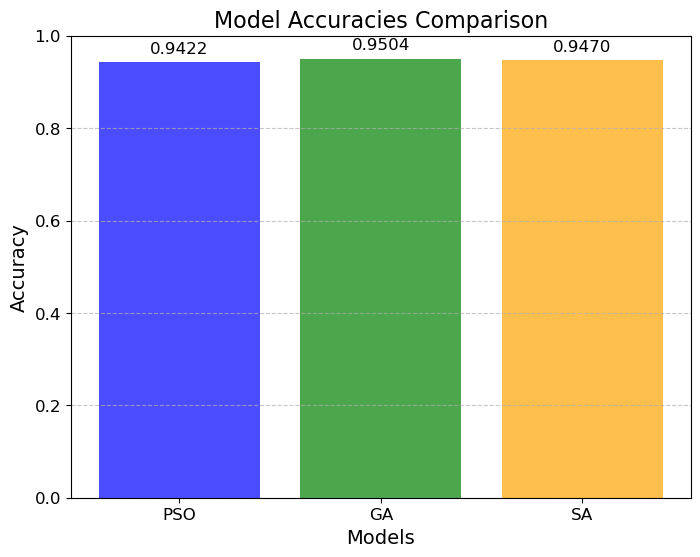

In [33]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'], alpha=0.7)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracies Comparison', fontsize=16)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=12)

plt.show()

### Result
1. PSO: 94.22%
2. GA: 95.04%
3. SA: 94.70%